In [170]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path


In [171]:
df = pd.read_csv('oakland.csv')
df.head()

,Metric,ST,ENTITY,CRDC ID,GROUP,SEX,AME,ASI,HI PAC,BLA,HIS,WHI,2+,TOT,504,LEP
0,"Law Referral, W/Out Dis",CA,Oakland Unified,"""0628050""",Law,F,0,2,0,54,24,0,0,80,0,0
1,"Law Referral, W/Out Dis",CA,Oakland Unified,"""0628050""",Law,M,0,0,0,58,39,0,0,97,0,26
2,"Law Referral, W/Out Dis",US,US,NaN,Law,F,1088,651,175,16658,12625,16212,1958,49367,0,2577
3,"Law Referral, W/Out Dis",US,US,NaN,Law,M,1664,1791,382,27202,25787,37370,3630,97826,0,6843
4,"Law Referral, With Dis",CA,Oakland Unified,"""0628050""",Law,F,0,0,0,14,0,0,0,14,0,0


In [172]:
df_oak = df[df['ENTITY'] == 'Oakland Unified']
df_dis = df_oak.groupby('Metric').sum()
df_dis

,ASI,BLA,HIS,WHI,2+,TOT,LEP
Metric,,,,,,,
"Law Referral, W/Out Dis",2,112,63,0,0,177,26
"Law Referral, With Dis",0,52,0,0,0,52,0
"School Related Arrest, W Dis",0,6,0,0,0,6,0
"School Related Arrest, W/Out Dis",0,16,6,0,0,22,0
Students With Disabilities served under IDEA,170,922,880,94,46,2112,829
"Students With Disabilities served under Section 504, Not IDEA",28,122,99,102,30,385,0
Total enrollment,5399,10296,15477,4044,1833,37645,12053


In [173]:
#percentage of Black students
oak_black = df_dis['BLA']['Total enrollment']
total = df_dis['TOT']['Total enrollment']
percent_black = oak_black/total
percent_black

0.27350245716562627

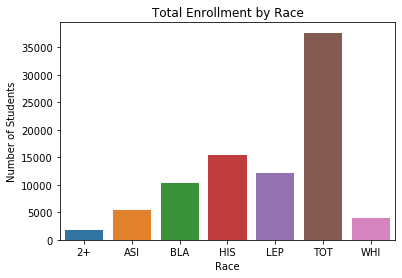

In [174]:
race = df_oak.groupby('Metric', as_index= False).sum()

race = pd.pivot_table(data = race, columns = ['Metric'], values = ['ASI', 'BLA', 'HIS', 'WHI', '2+', 'TOT', 'LEP'])
race = race.reset_index()

race = race.rename(columns={'index':'Race'})
sns.barplot(x='Race', y='Total enrollment', data=race).set(title='Total Enrollment by Race')
plt.ylabel("Number of Students")
plt.show()

In [175]:
race['Disability'] = race['Students With Disabilities served under IDEA'] + race['Students With Disabilities served under Section 504, Not IDEA']

#percentage of students with disabilities 
dis = list(race[race['Race']=="TOT"]['Disability'])[0]
percent_dis = (dis)/total
percent_dis

#percentage of Black students with disabilities
total_b = df_dis['BLA']['Total enrollment']
dis_black = list(race[race['Race']=="BLA"]['Disability'])[0]
percent_dis_b = dis_black/total_b


#percentage of White students with disabilities
total_w = df_dis['WHI']['Total enrollment']
dis_white = list(race[race['Race']=="WHI"]['Disability'])[0]
percent_dis_w = dis_white/total_w


percent_dis, percent_dis_b, percent_dis_w

(0.06633018993226192, 0.10139860139860139, 0.04846686449060336)

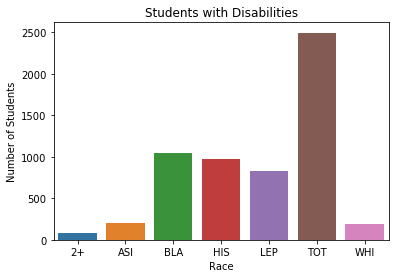

In [176]:
ax1 = sns.barplot(y='Disability', x = 'Race', data=race).set(title='Students with Disabilities')
plt.ylabel("Number of Students")
plt.show()

In [189]:
race['Law Referral'] = race['Law Referral, W/Out Dis'] + race['Law Referral, With Dis']
race['School Arrest'] = race['School Related Arrest, W Dis'] + race['School Related Arrest, W/Out Dis']

#percentage of disabled students referred to law enforcement ***100% are Black students***
dis_law_ref = df_dis['TOT']['Law Referral, With Dis']
total_ref = list(race[race['Race']=="TOT"]['Law Referral'])[0]
percent_ref_dis = dis_law_ref/total_ref

#percentage of disabled students with school related arrests ***100% are Black students***
dis_arrest = df_dis['TOT']['School Related Arrest, W Dis']
total_arrest = list(race[race['Race']=="TOT"]['School Arrest'])[0]
percent_arrest_dis = dis_arrest/total_arrest

percent_ref_dis, percent_arrest_dis

(0.22707423580786026, 0.21428571428571427)

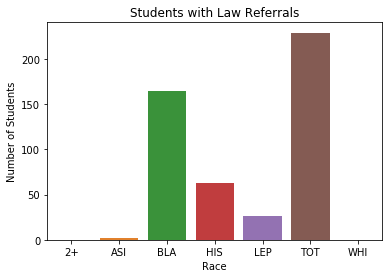

In [190]:
ax1 = sns.barplot(y='Law Referral', x = 'Race', data=race).set(title='Students with Law Referrals')
plt.ylabel('Number of Students')
plt.show()

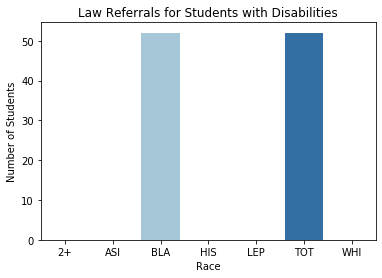

In [191]:
sns.barplot(y='Law Referral, With Dis', x = 'Race', data=race, palette = 'Blues').set(title='Law Referrals for Students with Disabilities')
plt.ylabel('Number of Students')
plt.show()

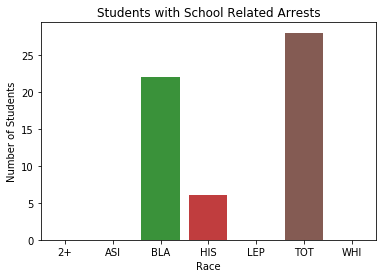

In [192]:
bx1 = sns.barplot(y='School Arrest', x = 'Race', data=race).set(title='Students with School Related Arrests')
plt.ylabel('Number of Students')
plt.show()

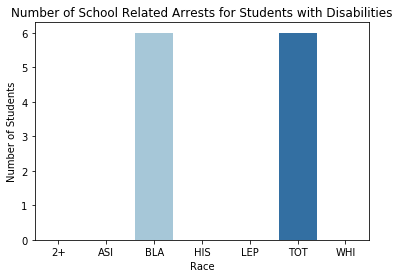

In [193]:
sns.barplot(y='School Related Arrest, W Dis', x = 'Race', data=race, palette = 'Blues').set(title='Number of School Related Arrests for Students with Disabilities')
plt.ylabel('Number of Students')
plt.show()

In [194]:
#percentage of all students referred to law enforcement
percent_ref = total_ref/total

#percentage of all students with school related arrests
percent_arrest = total_arrest/total

percent_ref, percent_arrest

(0.006083145172001594, 0.0007437906760525966)

In [195]:
#percentage of law enforcement referrels who were Black students
law_ref_b = list(race[race['Race']=="BLA"]['Law Referral'])[0]
percent_ref_b = law_ref_b/total_ref

#percentage school related arrests who were Black Students
arrest_b = list(race[race['Race']=="BLA"]['School Arrest'])[0]
percent_arrest_b = arrest_b/total_arrest

percent_ref_b, percent_arrest_b

(0.7161572052401747, 0.7857142857142857)

In [196]:
#percentage of law enforcement referrels who were White students
law_ref_w = list(race[race['Race']=="WHI"]['Law Referral'])[0]
percent_ref_w = law_ref_w/total_ref

#percentage school related arrests who were White Students
arrest_w = list(race[race['Race']=="WHI"]['School Arrest'])[0]
percent_arrest_w = arrest_w/total_arrest

percent_ref_w, percent_arrest_w

(0.0, 0.0)

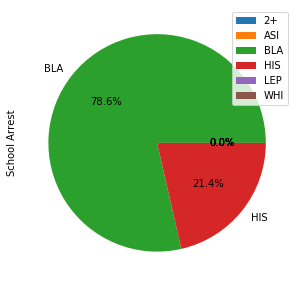

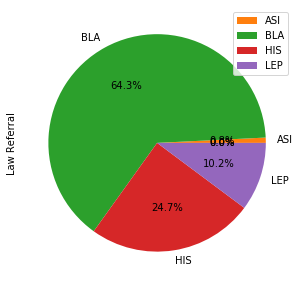

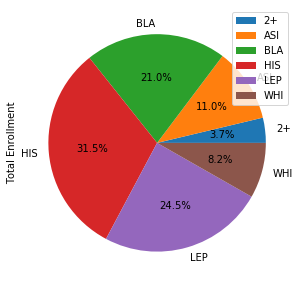

In [197]:
race_pie = pd.DataFrame({'School Arrest': list(race['School Arrest']),
                   'Law Referral': list(race['Law Referral']),
                    'Total Enrollment': list(race['Total enrollment'])},
                  index=race['Race'])
race_pie = race_pie.drop(['TOT'])
cx1 = race_pie.plot.pie(y='School Arrest', figsize=(5,5), autopct='%1.1f%%')
cx2 = race_pie.plot.pie(y='Law Referral', figsize=(5,5), autopct='%1.1f%%', subplots=True)
cx3 = race_pie.plot.pie(y='Total Enrollment', figsize=(5,5), autopct='%1.1f%%', subplots=True)

In [198]:
race

Metric,Race,"Law Referral, W/Out Dis","Law Referral, With Dis","School Related Arrest, W Dis","School Related Arrest, W/Out Dis",Students With Disabilities served under IDEA,"Students With Disabilities served under Section 504, Not IDEA",Total enrollment,Disability,Law Referral,School Arrest
0,2+,0,0,0,0,46,30,1833,76,0,0
1,ASI,2,0,0,0,170,28,5399,198,2,0
2,BLA,112,52,6,16,922,122,10296,1044,164,22
3,HIS,63,0,0,6,880,99,15477,979,63,6
4,LEP,26,0,0,0,829,0,12053,829,26,0
5,TOT,177,52,6,22,2112,385,37645,2497,229,28
6,WHI,0,0,0,0,94,102,4044,196,0,0


In [199]:
race_pie['School Arrest (%)'] = 100*(race_pie['School Arrest']/sum(race_pie['School Arrest']))
race_pie['Law Referral (%)'] = 100*(race_pie['Law Referral']/sum(race_pie['Law Referral']))
race_pie['Total Enrollment (%)'] = 100*(race_pie['Total Enrollment']/sum(race_pie['Total Enrollment']))
race_pie

,School Arrest,Law Referral,Total Enrollment,School Arrest (%),Law Referral (%),Total Enrollment (%)
Race,,,,,,
2+,0,0,1833,0.000000,0.000000,3.733045
ASI,0,2,5399,0.000000,0.784314,10.995479
BLA,22,164,10296,78.571429,64.313725,20.968596
HIS,6,63,15477,21.428571,24.705882,31.520101
LEP,0,26,12053,0.000000,10.196078,24.546862
WHI,0,0,4044,0.000000,0.000000,8.235917


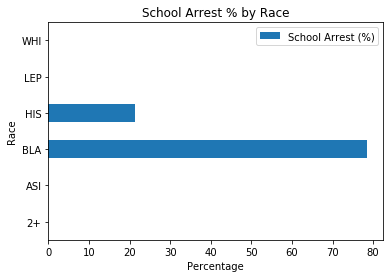

In [203]:
race_pie.plot.barh(y='School Arrest (%)').set(title='School Arrest % by Race')
plt.ylabel('Race')
plt.xlabel('Percentage')
plt.show()

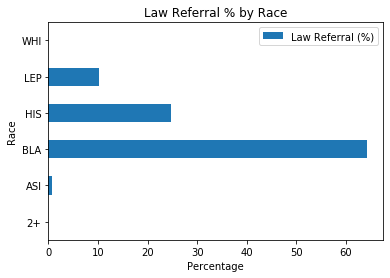

In [204]:
race_pie.plot.barh(y='Law Referral (%)').set(title='Law Referral % by Race')
plt.ylabel('Race')
plt.xlabel('Percentage')
plt.show()

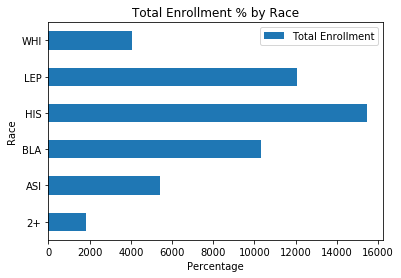

In [205]:
race_pie.plot.barh(y='Total Enrollment').set(title='Total Enrollment % by Race')
plt.ylabel('Race')
plt.xlabel('Percentage')
plt.show()